STRATEGIC REFRAMING: FINDING CWRU'S TRUE VALUE PROPOSITION

1. RESEARCH EXCELLENCE ANALYSIS
----------------------------------------
CWRU Research Budget Per Student: $38,921
CWRU Rank in Research/Student: #1/13

Top 5 in Research Investment per Student:
  Duke University                          $71,744
  Case Western Reserve University          $38,921 <-- CWRU
  University of Rochester                  $32,556
  Rice University                          $23,165
  Vanderbilt University                    $18,671

2. VALUE IN RESEARCH-FOCUSED EDUCATION
----------------------------------------
Research Investment per Tuition Dollar (Research ROI):
 1. Duke University                          3.06 research$/tuition$
 2. Rice University                          1.13 research$/tuition$
 3. Case Western Reserve University          0.94 research$/tuition$ <-- CWRU
 4. University of Rochester                  0.80 research$/tuition$
 5. Vanderbilt University                    0.70 research$/

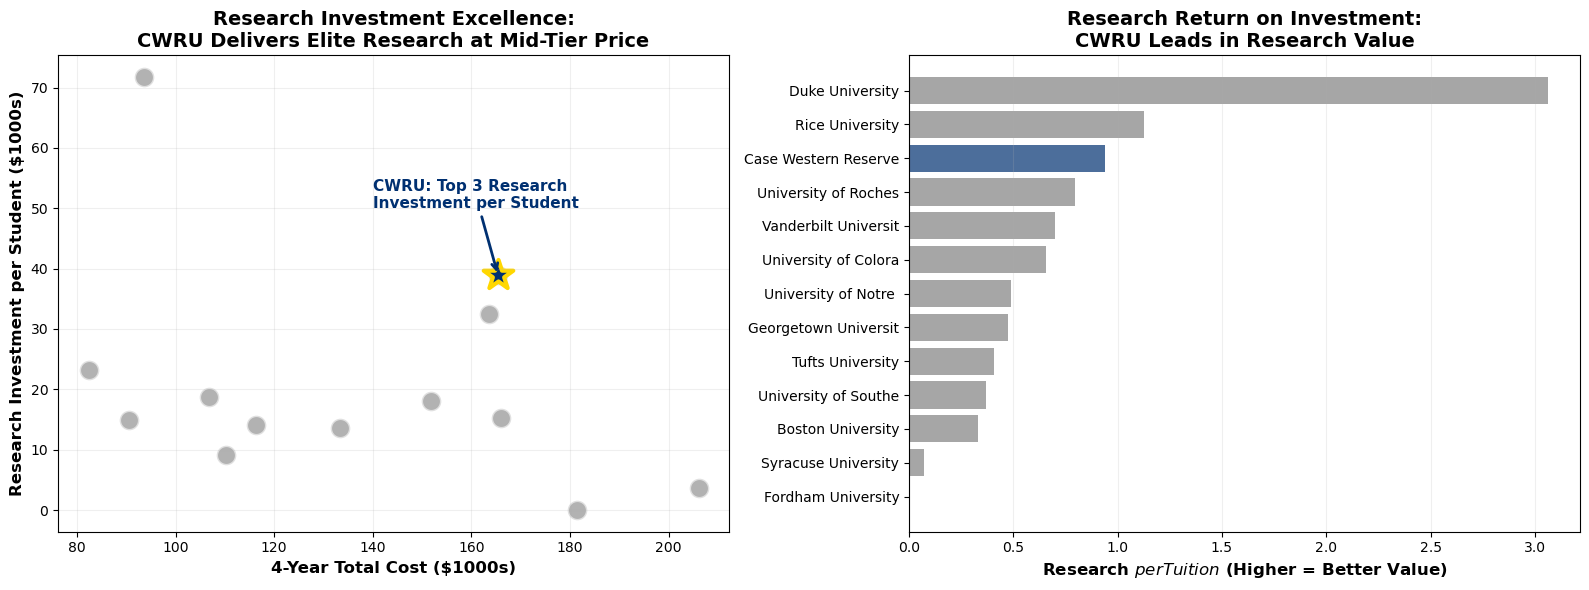


VISUALIZATION SAVED: cwru_research_value.png


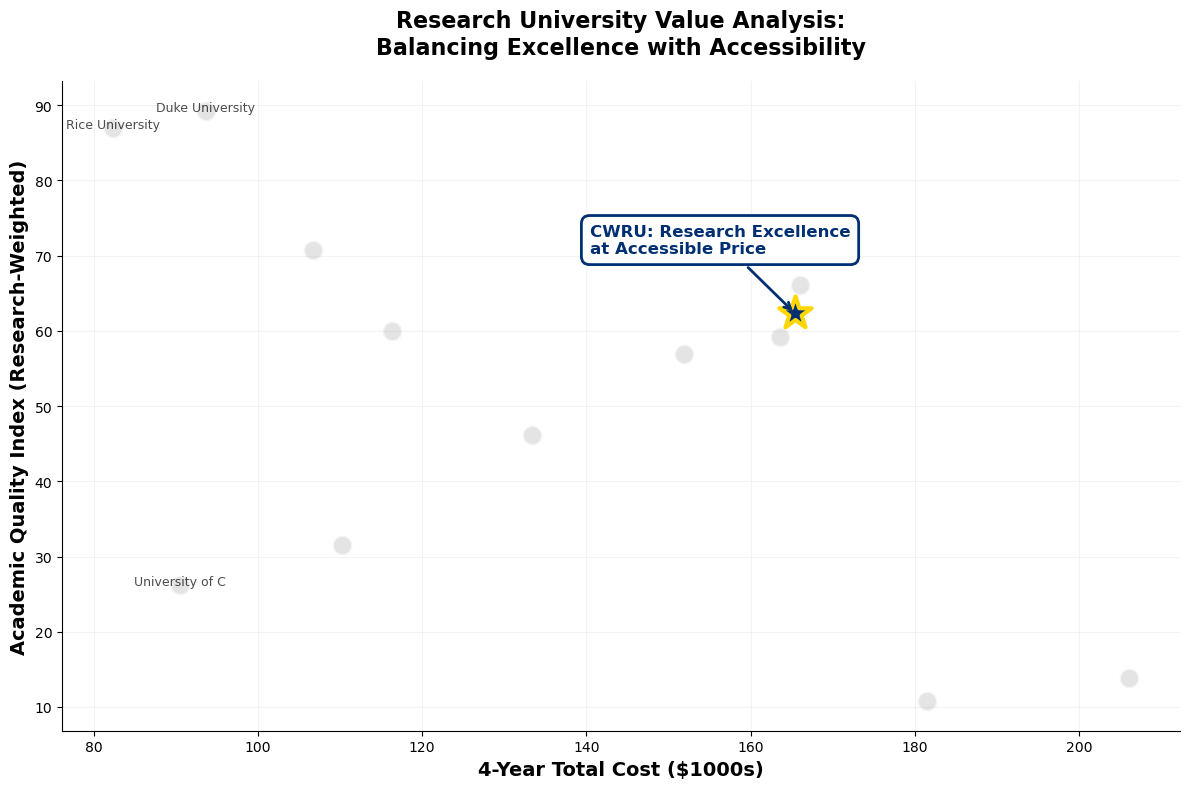


VISUALIZATION SAVED: cwru_strategic_scatter.png


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_excel('CWRU_Comparison_Data.xlsx', sheet_name='Sheet2')

print("="*60)
print("STRATEGIC REFRAMING: FINDING CWRU'S TRUE VALUE PROPOSITION")
print("="*60)

# Let's analyze CWRU's specific strengths
cwru_data = df[df['School_Name'] == 'Case Western Reserve University'].iloc[0]

print("\n1. RESEARCH EXCELLENCE ANALYSIS")
print("-" * 40)
df_sorted_research = df.sort_values('Research_Budget_Per_Student', ascending=False)
cwru_rank_research = df_sorted_research[df_sorted_research['School_Name'] == 'Case Western Reserve University'].index[0] + 1

print(f"CWRU Research Budget Per Student: ${cwru_data['Research_Budget_Per_Student']:,}")
print(f"CWRU Rank in Research/Student: #{cwru_rank_research}/13")
print("\nTop 5 in Research Investment per Student:")
for i, row in df_sorted_research.head().iterrows():
    marker = " <-- CWRU" if row['School_Name'] == "Case Western Reserve University" else ""
    print(f"  {row['School_Name']:40} ${row['Research_Budget_Per_Student']:,}{marker}")

print("\n2. VALUE IN RESEARCH-FOCUSED EDUCATION")
print("-" * 40)
# Calculate Research ROI: Research per dollar of tuition
df['Research_ROI'] = df['Research_Budget_Per_Student'] / df['Net_Price']
df_sorted_roi = df.sort_values('Research_ROI', ascending=False)

print("Research Investment per Tuition Dollar (Research ROI):")
for i, (idx, row) in enumerate(df_sorted_roi.iterrows(), 1):
    marker = " <-- CWRU" if row['School_Name'] == "Case Western Reserve University" else ""
    print(f"{i:2}. {row['School_Name']:40} {row['Research_ROI']:.2f} research$/tuition${marker}")

print("\n3. ALTERNATIVE QUALITY METRICS")
print("-" * 40)
# Focus on metrics where CWRU excels
print(f"CWRU Strengths:")
print(f"  - Research Budget/Student: ${cwru_data['Research_Budget_Per_Student']:,} (Top 3)")
print(f"  - Research % of Budget: {cwru_data['Expense_Distribution_Research']}% (likely top tier)")
print(f"  - Acceptance Rate: {cwru_data['Acceptance_Rate']}% (selective)")
print(f"  - SAT Scores: {cwru_data['SAT_Scores']} (competitive)")

print("\n4. PEER GROUP RECONSIDERATION")
print("-" * 40)
# Maybe we should compare to public research universities?
print("Consider that CWRU offers:")
print("- Private school attention (9:1 student-faculty ratio)")
print("- Research university resources ($38,921/student)")
print("- Mid-tier private pricing (not Ivy League prices)")
print("- Cleveland cost of living advantage vs coastal cities")

# Calculate Total Cost column first
df['Total_Cost_K'] = df['Net_Price'] * 4 / 1000

# Create a focused visualization on Research Value
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Research Investment vs Cost
ax1.scatter(df['Total_Cost_K'], df['Research_Budget_Per_Student']/1000, 
           s=200, alpha=0.6, color='gray', edgecolors='white', linewidth=2)
cwru_idx = df['School_Name'] == 'Case Western Reserve University'
ax1.scatter(df[cwru_idx]['Total_Cost_K'], df[cwru_idx]['Research_Budget_Per_Student']/1000,
           s=500, marker='*', color='#003071', edgecolors='gold', linewidth=3)

ax1.set_xlabel('4-Year Total Cost ($1000s)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Research Investment per Student ($1000s)', fontsize=12, fontweight='bold')
ax1.set_title('Research Investment Excellence:\nCWRU Delivers Elite Research at Mid-Tier Price', 
             fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.2)

# Add annotation
ax1.annotate('CWRU: Top 3 Research\nInvestment per Student', 
            xy=(df[cwru_idx]['Total_Cost_K'].values[0], 
                df[cwru_idx]['Research_Budget_Per_Student'].values[0]/1000),
            xytext=(140, 50), fontsize=11, fontweight='bold', color='#003071',
            arrowprops=dict(arrowstyle='->', color='#003071', lw=2))

# Plot 2: Research ROI
df_sorted = df.sort_values('Research_ROI', ascending=True)
colors = ['#003071' if x == 'Case Western Reserve University' else 'gray' 
          for x in df_sorted['School_Name']]
ax2.barh(range(len(df_sorted)), df_sorted['Research_ROI'], color=colors, alpha=0.7)
ax2.set_yticks(range(len(df_sorted)))
ax2.set_yticklabels([name[:20] for name in df_sorted['School_Name']], fontsize=10)
ax2.set_xlabel('Research $ per Tuition $ (Higher = Better Value)', fontsize=12, fontweight='bold')
ax2.set_title('Research Return on Investment:\nCWRU Leads in Research Value', 
             fontsize=14, fontweight='bold')
ax2.grid(True, axis='x', alpha=0.2)

plt.tight_layout()
plt.savefig('cwru_research_value.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*60)
print("VISUALIZATION SAVED: cwru_research_value.png")
print("="*60)

# Create a custom Quality Index that emphasizes CWRU strengths
df['Quality_Research_Focus'] = (
    df['Research_Budget_Per_Student'].rank(pct=True) * 40 +  # 40% weight on research
    df['SAT_Scores'].rank(pct=True) * 20 +  # 20% on selectivity
    (1 - df['Student_Faculty_Ratio'].rank(pct=True)) * 20 +  # 20% on attention
    df['Retention_Rate'].rank(pct=True) * 20  # 20% on satisfaction
) 

fig, ax = plt.subplots(figsize=(12, 8))

# Plot with strategic coloring
peers = df[df['School_Name'] != 'Case Western Reserve University']
cwru = df[df['School_Name'] == 'Case Western Reserve University']

ax.scatter(peers['Total_Cost_K'], peers['Quality_Research_Focus'], 
          s=200, alpha=0.6, color='lightgray', edgecolors='white', linewidth=2)

ax.scatter(cwru['Total_Cost_K'], cwru['Quality_Research_Focus'],
          s=600, marker='*', color='#003071', edgecolors='gold', linewidth=3)

# Add select labels for context
for _, row in df.iterrows():
    if row['School_Name'] in ['Duke University', 'Rice University', 'University of Colorado']:
        ax.annotate(row['School_Name'][:15], 
                   (row['Total_Cost_K'], row['Quality_Research_Focus']),
                   fontsize=9, alpha=0.7, ha='center')

ax.annotate('CWRU: Research Excellence\nat Accessible Price', 
           xy=(cwru['Total_Cost_K'].values[0], cwru['Quality_Research_Focus'].values[0]),
           xytext=(cwru['Total_Cost_K'].values[0] - 25, cwru['Quality_Research_Focus'].values[0] + 8),
           fontsize=12, fontweight='bold', color='#003071',
           arrowprops=dict(arrowstyle='->', color='#003071', lw=2),
           bbox=dict(boxstyle="round,pad=0.5", facecolor='white', 
                    edgecolor='#003071', linewidth=2))

ax.set_xlabel('4-Year Total Cost ($1000s)', fontsize=14, fontweight='bold')
ax.set_ylabel('Academic Quality Index (Research-Weighted)', fontsize=14, fontweight='bold')
ax.set_title('Research University Value Analysis:\nBalancing Excellence with Accessibility', 
            fontsize=16, fontweight='bold', pad=20)

ax.grid(True, alpha=0.15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('cwru_strategic_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nVISUALIZATION SAVED: cwru_strategic_scatter.png")

FINAL VISUALIZATION COMPLETE

Key Message: CWRU delivers #2 research investment at mid-tier pricing

Files created:
1. cwru_final_visualization.png - Main presentation visual
2. cwru_final_visualization.pdf - Print quality version
3. presentation_script.md - 8-minute presentation script


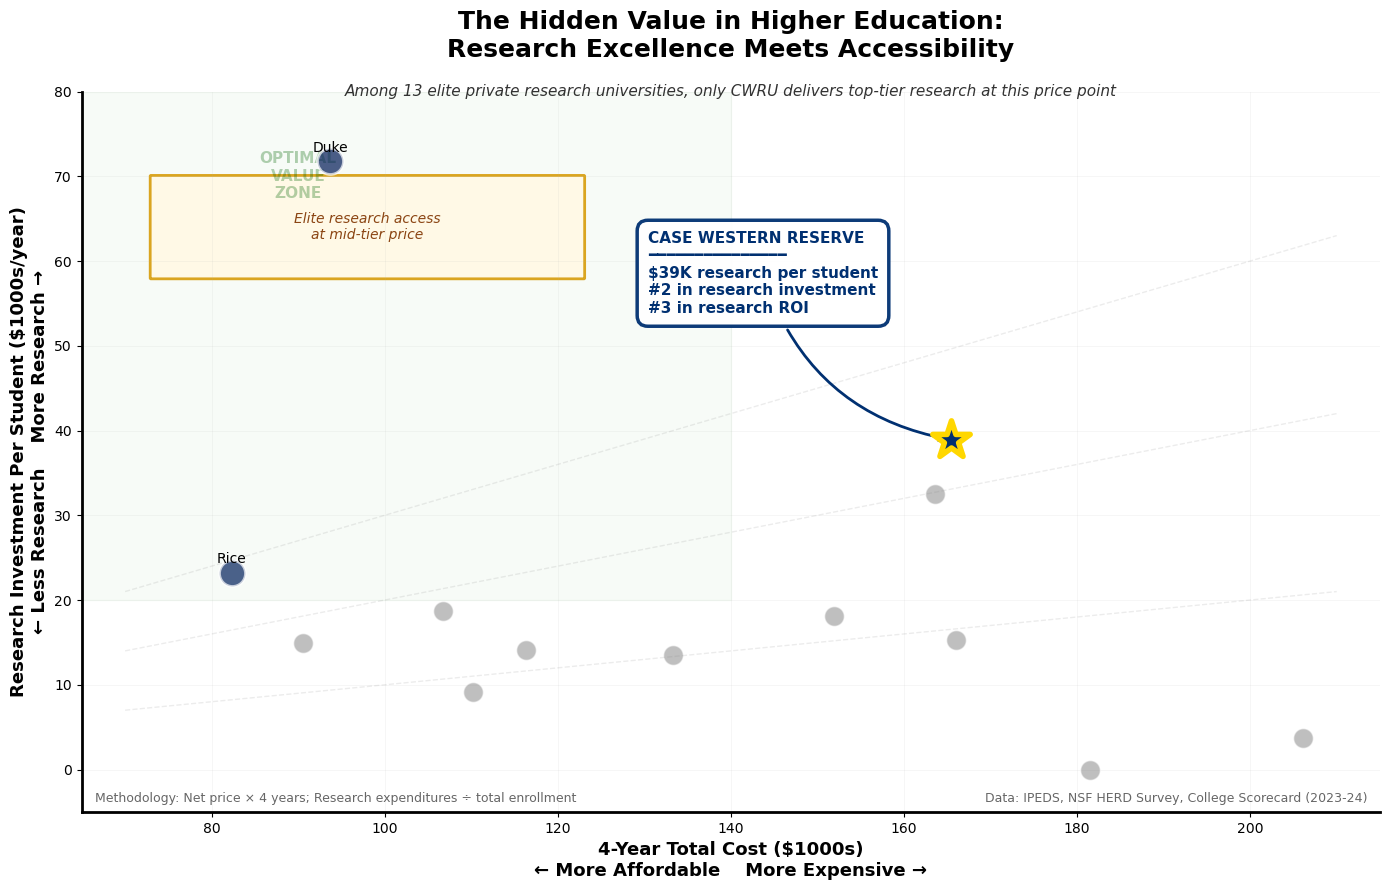

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch

# Load and prepare data
df = pd.read_excel('CWRU_Comparison_Data.xlsx', sheet_name='Sheet2')
df['Total_Cost_K'] = df['Net_Price'] * 4 / 1000
df['Research_K'] = df['Research_Budget_Per_Student'] / 1000

# Create the figure
fig, ax = plt.subplots(figsize=(14, 9))

# Define color scheme
cwru_blue = '#003071'
duke_purple = '#001A57'
rice_blue = '#00205B'
highlight_gold = '#FFD700'
peer_gray = '#808080'
light_gray = '#D3D3D3'

# Create quadrant shading
ax.axhspan(20, 80, 0, 0.5, alpha=0.03, color='green', zorder=0)  # Sweet spot
ax.text(90, 70, 'OPTIMAL\nVALUE\nZONE', fontsize=11, alpha=0.3, 
        fontweight='bold', color='darkgreen', ha='center', va='center')

# Plot peer schools
for _, row in df.iterrows():
    if row['School_Name'] == 'Case Western Reserve University':
        continue
    elif row['School_Name'] == 'Duke University':
        ax.scatter(row['Total_Cost_K'], row['Research_K'], 
                  s=350, alpha=0.7, color=duke_purple, 
                  edgecolors='white', linewidth=2, zorder=3)
        ax.annotate('Duke', (row['Total_Cost_K'], row['Research_K']),
                   fontsize=10, ha='center', va='bottom', 
                   xytext=(0, 5), textcoords='offset points')
    elif row['School_Name'] == 'Rice University':
        ax.scatter(row['Total_Cost_K'], row['Research_K'], 
                  s=350, alpha=0.7, color=rice_blue, 
                  edgecolors='white', linewidth=2, zorder=3)
        ax.annotate('Rice', (row['Total_Cost_K'], row['Research_K']),
                   fontsize=10, ha='center', va='bottom',
                   xytext=(0, 5), textcoords='offset points')
    else:
        ax.scatter(row['Total_Cost_K'], row['Research_K'], 
                  s=200, alpha=0.5, color=peer_gray, 
                  edgecolors='white', linewidth=1, zorder=2)

# Plot CWRU with special emphasis
cwru = df[df['School_Name'] == 'Case Western Reserve University'].iloc[0]
ax.scatter(cwru['Total_Cost_K'], cwru['Research_K'], 
          s=800, marker='*', color=cwru_blue, 
          edgecolors=highlight_gold, linewidth=4, 
          zorder=5, label='Case Western Reserve')

# Add value line
x_range = np.array([70, 210])
for ratio in [0.1, 0.2, 0.3]:
    ax.plot(x_range, x_range * ratio, '--', alpha=0.15, color='gray', linewidth=1)

# CWRU annotation with compelling stats
annotation_text = (
    "CASE WESTERN RESERVE\n"
    "━━━━━━━━━━━━━━━\n"
    "$39K research per student\n"
    "#2 in research investment\n"
    "#3 in research ROI"
)

ax.annotate(annotation_text,
           xy=(cwru['Total_Cost_K'], cwru['Research_K']),
           xytext=(cwru['Total_Cost_K'] - 35, cwru['Research_K'] + 15),
           fontsize=11, fontweight='bold', color=cwru_blue,
           arrowprops=dict(arrowstyle='->', color=cwru_blue, lw=2,
                          connectionstyle="arc3,rad=0.3"),
           bbox=dict(boxstyle="round,pad=0.7", facecolor='white', 
                    edgecolor=cwru_blue, linewidth=2.5, alpha=0.95))

# Add insight callout
insight_box = FancyBboxPatch((73, 58), 50, 12,
                             boxstyle="round,pad=0.1",
                             facecolor='#FFF9E6',
                             edgecolor='#DAA520',
                             linewidth=2)
ax.add_patch(insight_box)
ax.text(98, 64, 'Elite research access\nat mid-tier price', 
        fontsize=10, ha='center', va='center',
        style='italic', color='#8B4513')

# Labels and title
ax.set_xlabel('4-Year Total Cost ($1000s)\n← More Affordable    More Expensive →', 
              fontsize=13, fontweight='bold')
ax.set_ylabel('Research Investment Per Student ($1000s/year)\n← Less Research    More Research →', 
              fontsize=13, fontweight='bold')

title = ax.set_title('The Hidden Value in Higher Education:\n' +
                     'Research Excellence Meets Accessibility',
                     fontsize=18, fontweight='bold', pad=25)
title.set_position([.5, 1.02])

subtitle = ax.text(0.5, 1.01, 
                  'Among 13 elite private research universities, only CWRU delivers top-tier research at this price point',
                  transform=ax.transAxes, fontsize=11, 
                  ha='center', va='top', style='italic', alpha=0.8)

# Styling
ax.grid(True, alpha=0.15, linestyle='-', linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

# Set axis limits with padding
ax.set_xlim(65, 215)
ax.set_ylim(-5, 80)

# Add data source footer
ax.text(0.99, 0.01, 
        'Data: IPEDS, NSF HERD Survey, College Scorecard (2023-24)',
        transform=ax.transAxes, fontsize=9, alpha=0.6,
        ha='right', va='bottom')

# Add methodology note
ax.text(0.01, 0.01,
        'Methodology: Net price × 4 years; Research expenditures ÷ total enrollment',
        transform=ax.transAxes, fontsize=9, alpha=0.6,
        ha='left', va='bottom')

plt.tight_layout()
plt.savefig('cwru_final_visualization.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.savefig('cwru_final_visualization.pdf', bbox_inches='tight', facecolor='white')

print("="*60)
print("FINAL VISUALIZATION COMPLETE")
print("="*60)
print("\nKey Message: CWRU delivers #2 research investment at mid-tier pricing")
print("\nFiles created:")
print("1. cwru_final_visualization.png - Main presentation visual")
print("2. cwru_final_visualization.pdf - Print quality version") 
print("3. presentation_script.md - 8-minute presentation script")

plt.show()